In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize,Normalizer,scale,StandardScaler

from imblearn.over_sampling import SMOTE

In [4]:
news = pd.read_csv("OnlineNewsPopularity.csv")

In [5]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              396

In [17]:
news.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [8]:
news.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [9]:
news.columns = [i.strip() for i in news.columns]

In [10]:
news = news.drop(['timedelta','url'],axis=1)

# Histogram of number of words in the title

(array([3.4000e+01, 9.8900e+02, 6.3470e+03, 1.3636e+04, 1.2259e+04,
        5.2420e+03, 1.0150e+03, 1.1300e+02, 8.0000e+00, 1.0000e+00]),
 array([ 2. ,  4.1,  6.2,  8.3, 10.4, 12.5, 14.6, 16.7, 18.8, 20.9, 23. ]),
 <a list of 10 Patch objects>)

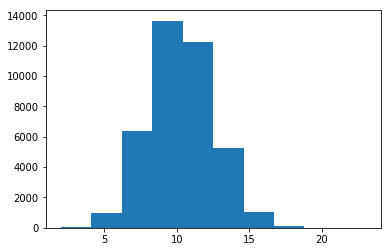

In [64]:
plt.hist(news['n_tokens_title'])

# Number of words in title vs. Shares

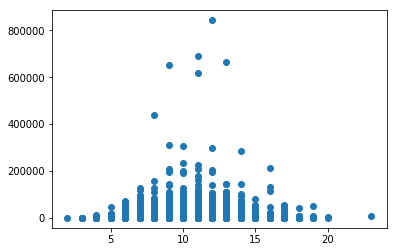

In [65]:
plt.scatter(news['n_tokens_title'],news['shares'])

The title of an article is probably the first thing that a user sees when interacting with an article. It could be the factor upon which a user decides whether to click on the link or not. Thus, shares may be influenced significantly by the length of the title, as that could lead to more views and potentially more shares. In this regard, a title may be too short or too long

# Number of words in the article vs. Shares

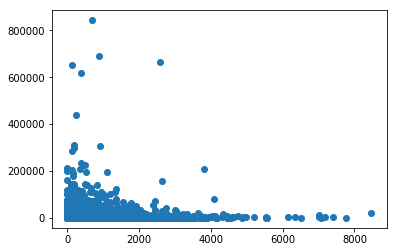

In [67]:
plt.scatter(news['n_tokens_content'],y=news['shares'])

The length of the article may also be a determining factor in whether an article gets shared or not. An article that is too long may discourage readers from finishing it and consequently decreasing the chances of resharing.

# Number of images vs. Shares

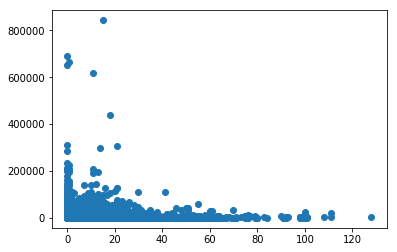

In [9]:
plt.scatter(news['num_imgs'],news['shares'])

(0, 40)

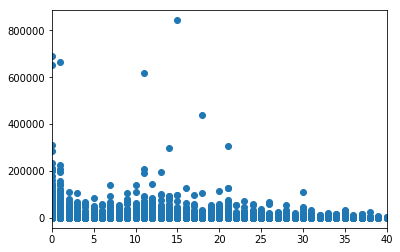

In [11]:
plt.scatter(news['num_imgs'],news['shares'])
plt.xlim(0,40)

# Number of videos in the article vs. Shares

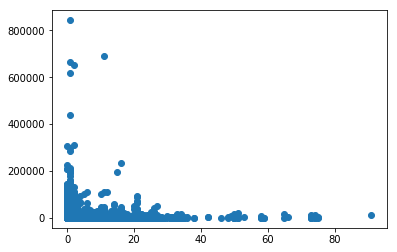

In [69]:
plt.scatter(news['num_videos'],news['shares'])

Both number of images and number of videos in the article could determine whether an article gets shared or not. In the digital age, with people's attention spans becoming shorter, articles that are succint and visual are generally the way to go. Here we can see that in the few outliers that have around and over 200,000 shares, a non-negligible amount of them possess between 10 and 20 images. However, there does appear to be a tipping point, after which increasing the number of images and/or videos leads to detrimental effect on the shares. This could be because it no longer focuses on one topic and there is no focus to the article, which could discourage users from sharing.

# Number of articles published per day

In [11]:
num_of_items_per_weekday = []
mean_shares_per_weekday = []
days_of_weeks = ['monday','tuesday','wednesday','thursday','friday','saturday','sunday']
for i in days_of_weeks:
    que = 'weekday_is_'+i+'==1.0'
    num_of_items_per_weekday.append(len(news.query(que)))
    mean_shares_per_weekday.append(news.query(que)['shares'].mean())

In [12]:
num_of_items_per_weekday

[6661, 7390, 7435, 7267, 5701, 2453, 2737]

### Total number of articles published per weekday

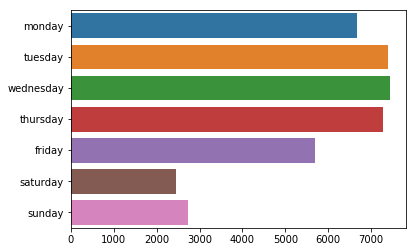

In [13]:
sns.barplot(num_of_items_per_weekday,days_of_weeks)

### Mean shares per day

In [39]:
mean_shares_per_weekday

[3647.0258219486564,
 3202.5006765899866,
 3303.4053799596504,
 3178.5991468281272,
 3285.181020873531,
 4078.1850794944967,
 3746.7405918889294]

There is a non-negligible increase in the number of shares on Saturday and Sunday when compared to the remaining days of the week. Also, Monday has a higher mean shares than the other weekdays.

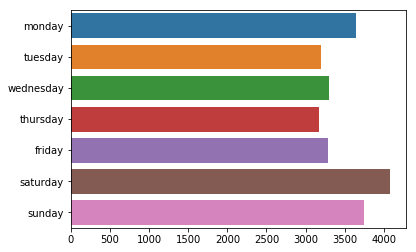

In [40]:
sns.barplot(mean_shares_per_weekday,days_of_weeks)

# Number of articles published per channel

In [33]:
num_of_items_per_channel = []
mean_shares_per_channel = []
channel = ['lifestyle','bus','entertainment','socmed','tech','world']
for i in channel:
    que = 'data_channel_is_'+i+'==1.0'
    num_of_items_per_channel.append(len(news.query(que)))
    mean_shares_per_channel.append(news.query(que)['shares'].mean())

In [26]:
num_of_items_per_channel

[2099, 6258, 7057, 2323, 7346, 8427]

In [34]:
mean_shares_per_channel

[3682.123392091472,
 3063.0185362735697,
 2970.487034150489,
 3629.383125269049,
 3072.283283419548,
 2287.734069063724]

## Mean shares by channel

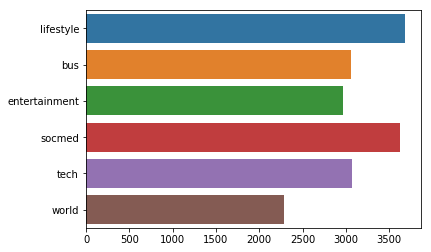

In [37]:
sns.barplot(mean_shares_per_channel,channel)

People like sharing lifestyle and social media articles substantially more than the other channels. This could be due to many reasons including: the websites userbases' disposition/preference for these topics, the lack of visibility of these topics on the website (i.e. less visitors to these pages), or that these articles are inherently less shareable than their lifestyle and social media counterparts.

In [2]:
?normalize

In [29]:
news['shares'].mean()

3395.3801836343455

In [30]:
news['shares'].median()

1400.0

In [54]:
news.query('shares>20000')

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
176,14.0,114.0,0.800000,1.0,0.875000,1.0,1.0,0.0,1.0,4.815789,...,0.050000,0.80,-0.540000,-1.000000,-0.300000,1.000000,0.250000,0.500000,0.250000,28000
270,13.0,140.0,0.786765,1.0,0.935897,2.0,1.0,0.0,0.0,4.207143,...,0.100000,0.80,-0.400000,-0.600000,-0.200000,0.800000,-0.600000,0.300000,0.600000,37400
324,13.0,747.0,0.519022,1.0,0.736239,14.0,11.0,1.0,0.0,4.431058,...,0.136364,0.70,-0.357639,-0.600000,-0.166667,0.300000,1.000000,0.200000,1.000000,25200
349,11.0,416.0,0.547368,1.0,0.655039,22.0,1.0,11.0,0.0,4.644231,...,0.100000,1.00,-0.166204,-0.187500,-0.155556,0.650000,0.350000,0.150000,0.350000,33100
410,13.0,749.0,0.424528,1.0,0.613065,8.0,3.0,1.0,1.0,4.376502,...,0.100000,1.00,-0.230556,-0.500000,-0.155556,0.166667,0.033333,0.333333,0.033333,39400
564,12.0,171.0,0.666667,1.0,0.863636,4.0,1.0,2.0,1.0,4.555556,...,0.433333,0.85,-0.200000,-0.200000,-0.200000,0.750000,0.675000,0.250000,0.675000,51900
854,10.0,216.0,0.643519,1.0,0.742187,4.0,3.0,1.0,0.0,4.634259,...,0.100000,1.00,-0.250000,-0.250000,-0.250000,0.400000,0.100000,0.100000,0.100000,22000
969,10.0,548.0,0.483333,1.0,0.677852,6.0,0.0,1.0,0.0,4.520073,...,0.100000,0.60,-0.125000,-0.125000,-0.125000,0.500000,-0.500000,0.000000,0.500000,39200
1124,11.0,297.0,0.687732,1.0,0.807692,3.0,2.0,0.0,21.0,4.420875,...,0.100000,1.00,-0.309744,-0.600000,-0.100000,0.300000,1.000000,0.200000,1.000000,30000
1215,8.0,1236.0,0.447627,1.0,0.634747,31.0,10.0,9.0,0.0,4.794498,...,0.033333,0.80,-0.243873,-0.700000,-0.100000,0.000000,0.000000,0.500000,0.000000,30200


# Preparing data for modelling

In [55]:
news.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [65]:
popular = news.shares >= 20000
unpopular = news.shares < 20000

In [66]:
news.loc[popular,'shares']=1
news.loc[unpopular,'shares']=0

In [67]:
news

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.700000,-0.350000,-0.600000,-0.200000,0.500000,-0.187500,0.000000,0.187500,0
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.700000,-0.118750,-0.125000,-0.100000,0.000000,0.000000,0.500000,0.000000,0
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.000000,-0.466667,-0.800000,-0.133333,0.000000,0.000000,0.500000,0.000000,0
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.800000,-0.369697,-0.600000,-0.166667,0.000000,0.000000,0.500000,0.000000,0
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.000000,-0.220192,-0.500000,-0.050000,0.454545,0.136364,0.045455,0.136364,0
5,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,0.0,4.359459,...,0.136364,0.600000,-0.195000,-0.400000,-0.100000,0.642857,0.214286,0.142857,0.214286,0
6,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,0.0,4.654167,...,0.100000,1.000000,-0.224479,-0.500000,-0.050000,0.000000,0.000000,0.500000,0.000000,0
7,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,0.0,4.617796,...,0.100000,1.000000,-0.242778,-0.500000,-0.050000,1.000000,0.500000,0.500000,0.500000,0
8,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,0.0,4.855670,...,0.400000,0.800000,-0.125000,-0.125000,-0.125000,0.125000,0.000000,0.375000,0.000000,0
9,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,1.0,5.090909,...,0.100000,0.500000,-0.238095,-0.500000,-0.100000,0.000000,0.000000,0.500000,0.000000,0


In [68]:
y = news['shares']

In [69]:
features = list(news.columns[0:58])

In [70]:
X = news[features]

In [60]:
scaler = StandardScaler()

## Splitting dataset into train and test sets

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [81]:
X_train.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
4540,11.0,613.0,0.483498,1.0,0.595960,30.0,2.0,12.0,0.0,4.430669,...,0.318977,0.100000,1.0,-0.253175,-0.6,-0.100000,0.552273,0.193182,0.052273,0.193182
23782,12.0,855.0,0.495062,1.0,0.614583,16.0,2.0,15.0,5.0,4.568421,...,0.328504,0.083333,0.8,-0.416176,-0.7,-0.166667,0.000000,0.000000,0.500000,0.000000
26808,9.0,370.0,0.528926,1.0,0.687500,7.0,1.0,1.0,0.0,4.732432,...,0.273810,0.033333,0.6,-0.195556,-0.3,-0.155556,0.000000,0.000000,0.500000,0.000000
8683,11.0,205.0,0.668367,1.0,0.767606,6.0,4.0,1.0,0.0,4.863415,...,0.346875,0.100000,1.0,-0.300000,-0.3,-0.300000,0.000000,0.000000,0.500000,0.000000
22631,12.0,517.0,0.533981,1.0,0.647541,16.0,1.0,1.0,0.0,5.779497,...,0.354545,0.100000,1.0,-0.200000,-0.2,-0.200000,0.500000,0.500000,0.000000,0.500000
